In [10]:
import pyvisa
import numpy
from matplotlib import pyplot as plt

In [11]:
rm = pyvisa.ResourceManager()

In [12]:
rm.list_resources()

('USB0::21317::4661::2110092::0::INSTR',)

In [4]:
inst = rm.open_resource('USB0::21317::4661::2110092::0::INSTR')

ValueError: No device found.

In [66]:
print(inst.query("*IDN?"))

OWON VDS6102 2110092 V1.2.0



In [67]:
inst.write(':RUN')
#inst.write(':AUT')

6

1.0us

TRIG



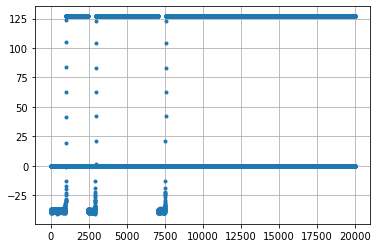

In [116]:
inst.write(':WAV:BEG CH1')
inst.query_binary_values(':WAV:PRE?',datatype='b');
inst.write(':WAV:RANG 0,10000')

inst.write(':HORI:SCAL 1.0us')
print(inst.query(':HORI:SCAL?'))
print(inst.query(':TRIGger:STATUS?'))


data = inst.query_binary_values(':WAV:FETC?',datatype='b')
inst.write(':WAV:END;\n')

plt.plot(data, ".")
plt.grid()

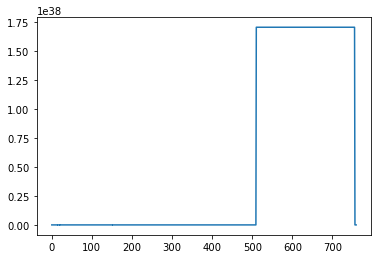

In [118]:
data_result = inst.query_binary_values(':WAV:DATA?')
#print(data_result)
type(data_result[0])
plt.plot(data_result)

In [119]:
inst.write(':STOP')

7